# ICAT3190, Module 1, Excercises, v2


## Task 1

Implement a function which calculates the Root Mean Square value of the input vector, according to the following formula:

$$x_{rms}=\sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2} $$'

Name your function as `myRMS`. It should take one input vector (x) as input and it returns single RMS value as output. Code your function in the cell below. When you think it is ready, execute it by pressing `Shift-Enter`. Then you can run the test cases in the next cell by hitting `Shift-Enter` again.

- Remember to import necessary libraries, like numpy.
- You may assume that the input vector is a numpy array, for example `x=np.array([1,2,3,4,5])`, or `x=np.linspace(0,1,500)`.
- The power operator in python is `**`, while in many other programming languages it is `^`

Read basics about python programming from [Dive into Python](https://diveinto.org/python3/table-of-contents.html) and use the documentation of [Numpy](https://numpy.org/).

Check also the execution time of your program.

In [1]:
import numpy as np
import math


def myRMS(inputVector):
    x = np.array(inputVector)
    y = x**2
    z = y.sum()
    p = z/len(x)
    t = math.sqrt(p)
    return t
        
myRMS([1, 2, 3])
       
    

2.160246899469287

In [2]:
### Tests for your code, Do not change!
### -----------------------------------
from scipy.linalg import norm
import numpy as np

# Make a function for calculating rms using norm
trms = lambda x : norm(x)/np.sqrt(len(x))

x1=np.array([2,2,2,2,2])
assert(myRMS(x1)==2)

x2=np.array([3,4,5.2,8,-2,0,1.2])
assert(myRMS(x2)==trms(x2))

x3=np.random.normal(5,2,size=500)
assert(myRMS(x3)==trms(x3))

# Time it
x4=np.random.normal(5,2,size=1000000)
%time myRMS(x4)


Wall time: 25 ms


5.386481073229473

## Task 2

Create a polynomial signal, $y$, and add some normal noise $\mathcal{N}(\mu, \sigma)$ into it, where, $\mu$, is the mean value of the noise and, $\sigma$, is the standard deviation. Calculate the values of the signal in 100 points between $x \in [0, 3]$. Create the signal according to the following formula:

$$y=0.1 x^2 + 1.5 x + \mathcal{N}(0,0.5) $$

Then make a scatter plot of the $y$ against $x$. You can use the standard plot function, but do not use a line plot but plot only dots for all values using syntax `plt.plot(x,y,'*')`. Remember to import `plt` module from `matplotlib.pyplot as plt`.

See how normal noise was created in the test cell (In [15]) of previous Task, using `np.random.normal()`. Use `np.linspace()` function to create a linear x-axis as was also shown in lecture notes.

See examples from [MatplotLib tutorials](https://matplotlib.org/3.1.1/tutorials/index.html).

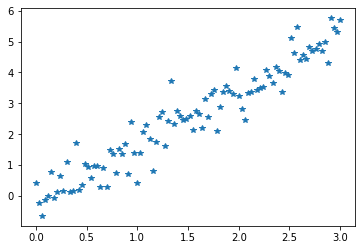

In [15]:
### Code your solution here
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,3,100)
y = 0.1*x**2 + 1.5*x + np.random.normal(0, 0.5, len(x))
plt.plot(x,y, '*')

In [2]:
### Tests for your code, Do not change!
### -----------------------------------
assert(len(x)==100)
assert((y.mean()>2.4) and (y.mean()<2.7))
assert((y.min()>-1) and (y.max()<6.4))
assert((y.std()>1.2) and (y.std()<2))

NameError: name 'x' is not defined

## Task 3
Fit orninary linearn regression model into the data which you just created, using the statsmodel library. Read instructions from [statsmodel documentation](https://www.statsmodels.org/stable/index.html). Use the second example for numpy arrays.

In python data models, the typical flow of action is that you first import the model class from a library, then you instanatiate the model and then you fit the model to the data. The fitted model contains the model parameters and also some statistics describing the fitness of the model.

Now do the following:
 1. Import statsmodels.api module
 1. Instantiate OLS model and store it as variable `model`
 1. Fit your model to the data, y,x and store your fitted model as variable `fmodel`
 1. Print the summary of your model according to the instructions in the documentation
 1. Study especially three values in the summary
   1. R-squared
   1. The coef-parameter of x1
   1. The P-value of x1
   
- Does the model fit into the data? How much variance does it explain?
R-squared = 0.974, so the model is explaining 97,4%. With the x values, 97.4% of the y values can be explained. If R-squared is high, the model fits better to the data, than when its low. (Source: https://www.fsd.uta.fi/menetelmaopetus/regressio/analyysi.html)

- The model is linear, so it tries to fit a line into the data, what is the slope of the fitted line?
By adding "print(fmodel.params)" to the code, we get 1.70584003 as the slope of the fitted line. So when the x moves 1.0 to the right, the y moves 1.70584003 to up. 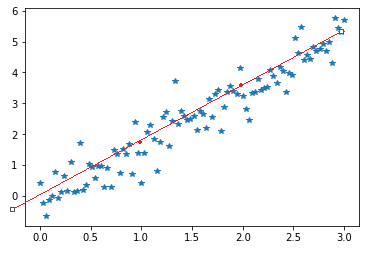



- What is the probability that the slope is actually zero, but it is now found to be different by chance?
The Prob(F) is now 3.05 x 10^-80 which is the probability for the null hypothesis for the full model to be true. Now there is a 3.05 x 10^-80 chance that all of the regression parameters are zero.

In [16]:
### Code your solution here
import statsmodels.api as sm
model = sm.OLS(y, x)
fmodel=model.fit()
print(fmodel.summary())
print(fmodel.params)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              3703.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):                    3.05e-80
Time:                        18:10:49   Log-Likelihood:                         -69.398
No. Observations:                 100   AIC:                                      140.8
Df Residuals:                      99   BIC:                                      143.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [3]:
### Tests for your code, Do not change!
### -----------------------------------
assert(round(fmodel.params[0],1)==1.7)

NameError: name 'fmodel' is not defined